# Exploratory Data Analysis
This jupyter notebook focuses on various tools used can be used for EDA <br>

As an example, <b>Titanic</b> data taken from Kaggle <br>

Following things are covered:
<ol>
<li>Getting Data</li>
<li>Data Cleaning and Manipulation</li>
<li>Exploratory Data Analysis (EDA)</li>
<ul>
<li>Data Exploration using Pandas</li>
<li>Data Exploration using Visualization techniques</li>
<li>Data Exploration using Tensorflow validator</li>
<li>Data Exploration using Lux</li>
</ul>
<li>Takeaways</li>
</ol>

In [1]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv

import warnings
warnings.filterwarnings('ignore')

# 1. Getting Data
## Titanic dataset column information

Column description:
<ol>
<li><b>survival</b> - Survival (0 = No; 1 = Yes)</li>
<li><b>Pclass</b>   - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li><b>name</b>     - Name</li>
<li><b>sex</b>      - Sex</li>
<li><b>age</b>      - Age</li>
<li><b>sibsp</b>    - Number of Siblings/Spouses Aboard</li>
<li><b>parch</b>    - Number of Parents/Children Aboard</li>
<li><b>ticket</b>   - Ticket Number</li>
<li><b>fare</b>     - Passenger Fare</li>
<li><b>cabin</b>    - Cabin</li>
<li><b>embarked</b> - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)​</li>
</ol>


In [2]:
# import data into pandas
df = pd.read_csv("./Dataset/train.csv")

# check first 5 records
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Cleaning and Manipulation

## Handling missing data


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. Handling <b>Age</b> column null value
<ul>
<li>We could replace the null value of AGE by mean.</li>
<li>However, here I would take Sex and Pclass mean age to replace null values.</li>
</ul>

In [4]:
# Age 
# Missing age data in different passenger class
df[df.Age.isnull()].Pclass.groupby(df.Pclass).count()

Pclass
1     30
2     11
3    136
Name: Pclass, dtype: int64

In [5]:
#mean calculation
mean_1_male = df.loc[(df.Age.notnull()) & (df.Pclass == 1) & (df.Sex == 'male')].Age.mean()
mean_2_male = df.loc[(df.Age.notnull()) & (df.Pclass == 2) & (df.Sex == 'male')].Age.mean()
mean_3_male = df.loc[(df.Age.notnull()) & (df.Pclass == 3) & (df.Sex == 'male')].Age.mean()

mean_1_female = df.loc[(df.Age.notnull()) & (df.Pclass == 1) & (df.Sex == 'female')].Age.mean()
mean_2_female = df.loc[(df.Age.notnull()) & (df.Pclass == 2) & (df.Sex == 'female')].Age.mean()
mean_3_female = df.loc[(df.Age.notnull()) & (df.Pclass == 3) & (df.Sex == 'female')].Age.mean()

#function for age data cleaning
def replaceAge(dataframe):
    #fill null value with mean based on sub-group
    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==1) & (dataframe['Sex']=='male')), mean_1_male, dataframe['Age'])
    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==2) & (dataframe['Sex']=='male')), mean_2_male, dataframe['Age'])
    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==3) & (dataframe['Sex']=='male')), mean_3_male, dataframe['Age'])

    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==1) & (dataframe['Sex']=='female')), mean_1_female, dataframe['Age'])
    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==2) & (dataframe['Sex']=='female')), mean_2_female, dataframe['Age'])
    dataframe['Age'] = np.where(((dataframe.Age.isnull()) & (dataframe['Pclass']==3) & (dataframe['Sex']=='female')), mean_3_female, dataframe['Age'])

    return dataframe

#cleaned data
df_Cleaned = replaceAge(df)

#now all age data is not null
df_Cleaned.isnull().sum() 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Handling <b>Cabin</b> column null value
<ul>
<li>Here fill null with X</li>
</ul>

In [6]:
#cabin 687 missing value
df_Cleaned[df_Cleaned['Cabin'].isnull()].Pclass.groupby(df_Cleaned['Pclass']).count()

Pclass
1     40
2    168
3    479
Name: Pclass, dtype: int64

In [7]:
#replacing unknown with X
df_Cleaned['Cabin'].fillna('X', inplace=True)

#now all cabin data is not null
df_Cleaned.isnull().sum() # All cabin null value replaced by X

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### 3. Handling <b>Embarked</b> column null value <br>
Two possibilities:
<ul>
<li>Drop null</li>
<li>Since missing value from 1st class passenger. Replace unknown with place where max people who boarded in first class. (Most people boarded from S.)</li>
</ul>

In [8]:
#replacing null values with the maximum occuracnce of passengers from 1 st class
df_Cleaned['Embarked'].fillna(df_Cleaned.loc[(df_Cleaned.Embarked.notnull()) & (df_Cleaned.Pclass == 1)].Embarked.value_counts().index[0], inplace=True)

#checking the null values again
df_Cleaned.isnull().sum() # No null value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Categorical features
### Feature manipulation of following columns:
<ol>
<li>Name</li>
<li>Cabin</li>
</ol>

In [9]:
# function to create  
def extract_info(dataframe):
    dataframe['Title'] = dataframe['Name'].str.extract(r',\s*([^\.]*)\s*\.',expand=False)
    surnames = {'Lady':1, 'Master':1, 'the Countess':1, 'Jonkheer':1, 'Sir':1, 'Don':1, 'Dr':1,
                 'Mrs':2, 'Mme':2, 
                 'Miss':3, 'Mlle':3, 'Ms':3,
                 'Mr':4, 
                 'Capt': 5, 'Col':5, 'Major':5, 'Rev':5 }
    dataframe['Title'] = dataframe['Title'].map(surnames)
    dataframe['Cabin'] = dataframe['Cabin'].map(lambda x: x[0])               #first letter of cabin
    dataframe = dataframe.drop(['Name'], axis=1)
    return dataframe

In [10]:
df_manipulated = extract_info(df_Cleaned)
df_manipulated.head(n=5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,X,S,4
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,3
3,4,1,1,female,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,X,S,4


In [55]:
# save data to local
df_manipulated.to_csv("./Dataset/train_cleaned.csv")

# 3. Exploratory Data Analysis

## Data Exploration using Pandas

### Get a little bit more information such as
<ol>
<li>number of columns</li>
<li>column dtype</li>
<li>column names</li>
<li>number of data points</li>
</ol>

There should not be any null values as it has already been handled

In [11]:
df_manipulated.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


### Dataset contains 11 columns
<ul>
<li><b>Features:</b> {PassengerId , Pclass, Name, ...... , Cabin, Embarked}</li>
<li><b>Target:</b> Survived</li>
</ul>

### Describe dataset little bit more and get important statistics of numeric columns
<ol>
<li>min</li>
<li>max</li>
<li>mean</li>
<li>distribution</li>
</ol>

In [12]:
df_manipulated.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208,3.346801
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429,0.940857
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400,3.000000
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200,4.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,5.000000


### Answering some important questions
<ol>
<li>How many survived?</li>
<li>Is there any difference in the survival rate based on gender?</li>
<li>Does Passengers class has some influence?</li>
<li>What about survival rate of passengers based on Title?</li>
<li>What about survival rate of passengers based on Cabin?</li>
</ol>

### How many survived?
<br>
<br>
<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

In [13]:
df_manipulated['PassengerId'].groupby(df_manipulated['Survived']).count()/len(df_manipulated)*100

Survived
0    61.616162
1    38.383838
Name: PassengerId, dtype: float64

#### 38.4% survived
<ul>
<li>61.6% passengers from given dataset didn't survived</li>
<li>38.4% passengers from given dataset did survive</li>
</ul>

#### Slight imbalance in dataset <br>

### Is there any difference in the survival rate based on gender?
<ol>
<li>What is the passengers count based on gender?</li>
<li>What is the percentage of female passengers survived?</li>
<li>What is the Percentage of male passengers survived?</li>
</ol>
<br>
<br>
<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

#### What is the passengers count based on gender?

In [15]:
df_manipulated['Sex'].groupby(df_manipulated['Sex']).count()

Sex
female    314
male      577
Name: Sex, dtype: int64

#### Gender
<ol>
<li>Female : 314 out of 891</li>
<li>Male : 577 out of 891</li>
</ol>

#### What is the percentage of female passengers survived?


In [16]:
df_manipulated[df_manipulated.Sex == 'female'].Sex.groupby(df_manipulated.Survived).count()/len(df_manipulated[df_manipulated.Sex == 'female'])*100

Survived
0    25.796178
1    74.203822
Name: Sex, dtype: float64

<b>Female passengers survived : </b> 74.2% 

#### What is the percentage of male passengers survived?

In [17]:
df_manipulated[df_manipulated.Sex == 'male'].Sex.groupby(df_manipulated.Survived).count()/len(df_manipulated[df_manipulated.Sex == 'male'])*100

Survived
0    81.109185
1    18.890815
Name: Sex, dtype: float64

<b>Male passengers survived : </b> 18.9% 

#### There is an easy trick for pro users

In [18]:
#In short
df_manipulated[['Sex', 'Survived']].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


### Does Passengers class has some influence?

In [19]:
df_manipulated[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


Class 1st passenger survival rate was more comaprison to 2nd and 3rd. <br>
<b>Note: </b> Please keep in mind this is the comparison within a group not with total population.

### What about survival rate of passengers based on Title?

<ol>
<li>Lady, Master, The Countess, Jonkheer, Sir, Don, Dr. </li>
<li>Mrs, Mme</li>
<li>Miss, Mlle, Ms</li>
<li>Mr</li>
<li>Capt, Col, Major, Rev</li>
</ol>

In [20]:
df_manipulated[['Title', 'Survived']].groupby(['Title']).mean()*100

,Survived
Title,
1,55.769231
2,79.365079
3,70.270270
4,15.667311
5,18.181818


### What about survival rate of passengers based on Cabin?

In [21]:
df_manipulated[['Cabin', 'Survived']].groupby(['Cabin']).mean()*100

,Survived
Cabin,
A,46.666667
B,74.468085
C,59.322034
D,75.757576
E,75.000000
F,61.538462
G,50.000000
T,0.000000
X,29.985444


#### Passengers in Cabin

In [24]:
df_manipulated[['Cabin', 'PassengerId']].groupby(['Cabin']).count()

,PassengerId
Cabin,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
X,687


Here Cabin X is the unknown values that was given during data cleaning process

## Data Exploration using Visualization techniques


#### 1. Pairplot
Pairplot to see how different columns are related and how their distribution looks like
<br>
<br>
<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

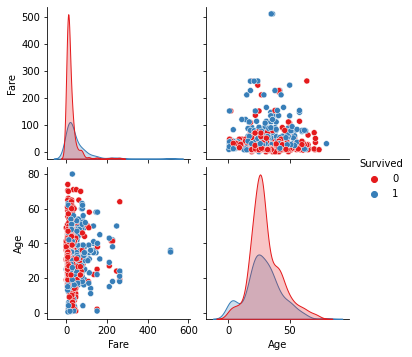

In [27]:
# some quick visualizatioon
numeric_columns = ['Fare', 'Age', 'Survived']

#pairplot
sns.pairplot(df_manipulated[numeric_columns] ,hue="Survived", palette='Set1');


From the plot above we do see outliers for Fair feature 

#### 2. Jointplot
Jointplot to see Age group of passengers travelling in which Class and survival rate
<br>
<br>
<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

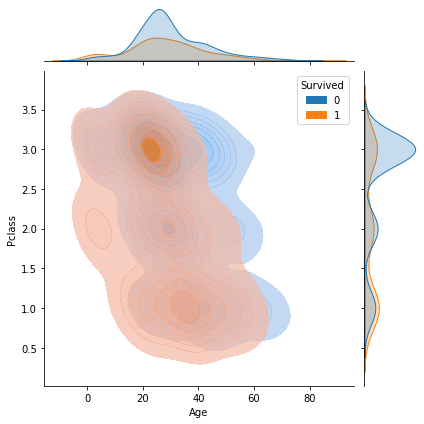

In [29]:
#Let's check the age distribution in class
sns.jointplot(x='Age', y='Pclass', hue='Survived', data=df_manipulated, kind='kde',fill=True, joint_kws={'alpha': 0.7});

From the jointplot above one can conclude the following:
<ul>
<li>Average young population around 20 were travelling in 3rd Class</li>
<li>Survival rate of 1st class is higher</li>
</ul>

Another jointplot to see relationship between Age and Fare based on Class

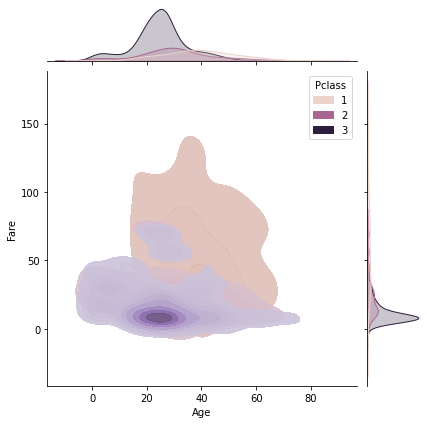

In [36]:
#Let's check the age distribution in class
sns.jointplot(x='Age', y='Fare', hue='Pclass', data=df_manipulated[df_manipulated.Fare<150], kind='kde',fill=True, joint_kws={'alpha': 0.9});

From the jointplot above one can conclude the following:
<ul>
<li>Some early birds may have got a good deal and were travelling in 1st Class at low Fare</li>
<li>1st class fare price is much higher</li>
</ul>

#### 3. Boxplot
comparing <b>age</b> of passengers travelling in certain <b>class</b> based on <b>gender</b>

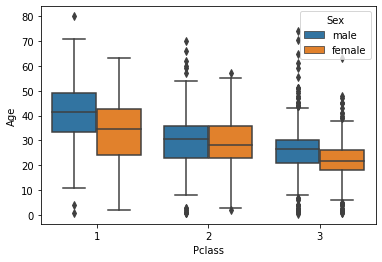

In [38]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df_manipulated[df_manipulated.Age.notnull()]);

Same conclusion can be drawn that More young passengers were in 3rd Class (ofcourse there are some outliers) <br>
<br>
Another boxplot to see relationship between Age and Class based on Survival
<br>
<br>
<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

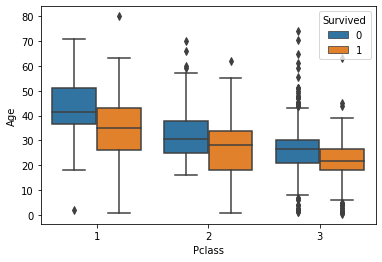

In [39]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df_manipulated[df_manipulated.Age.notnull()]);

From the boxplot above one can conclude the following:
<ul>
<li>Young people within the class survived more</li>
</ul>

#### 4. Histogram

A histogram below shows the survival based on Title
<br>

<b> Number on x-axis represents: </b>
<ol>
<li>Lady, Master, The Countess, Jonkheer, Sir, Don, Dr. </li>
<li>Mrs, Mme</li>
<li>Miss, Mlle, Ms</li>
<li>Mr</li>
<li>Capt, Col, Major, Rev</li>
</ol>

<br>

<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

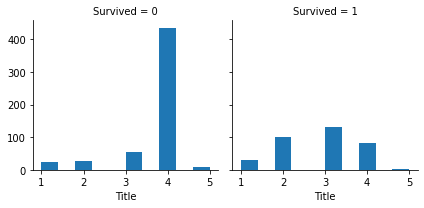

In [41]:
sns.FacetGrid(df_manipulated, col='Survived').map(plt.hist, "Title");

#### 5. KDE plot

KDE plot shows the normalized stacked distribution at each Fare value in the grid based on Class

<AxesSubplot:xlabel='Fare', ylabel='Density'>

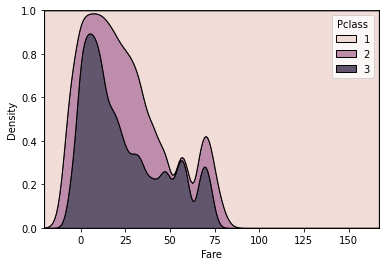

In [49]:
sns.kdeplot(data=df_manipulated[df_manipulated.Fare<150], x="Fare", hue="Pclass", multiple="fill");


#### 6. Scatter plot

Scatter plot to show Age vs Fare based on survival

<br>

<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

<AxesSubplot:xlabel='Age', ylabel='Fare'>

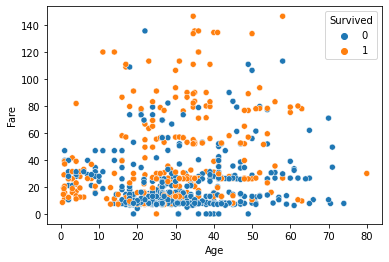

In [53]:
sns.scatterplot(data=df_manipulated[df_manipulated.Fare<150], x="Age", y="Fare", hue="Survived")

#### 7. Count plot

Count plot to show number of passengers in dataset who survived or did not survived

<br>

<b> Number in survived column represents: </b>
<ol>
<li>0 = Not Suvived </li>
<li>1 = Survived</li>
</ol>

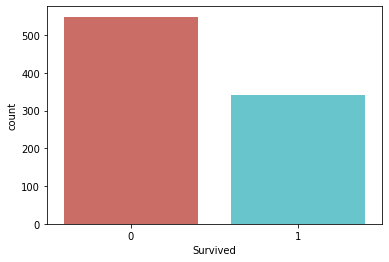

In [54]:
sns.countplot(x = 'Survived', data=df_manipulated, palette='hls')
plt.show() 

## Data Exploration using Tensorflow validator


<br>
<b> Data visualization using tensorflow data validation </b>
<ul>
<li>Tensorflow data validation offers quickly to look at missing values </li>
<li>It is a combination of data exploration done with pandas and visualization shown above</li>
<li>One can export schema of data and later can use it during inference for data validation</li>
</ul>

### Exploring raw data first


In [56]:
raw_data = tfdv.generate_statistics_from_csv(data_location="./Dataset/train.csv");
#visualize data
tfdv.visualize_statistics(raw_data) 

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


<b> With 2 lines of code one can get the following informations: </b>
<ul>
<li>Data count</li>
<li>Missing values</li>
<li>Stats of numeric and categorical columns</li>
<li>Stats of numeric and categorical columns</li>
<li>Distribution of each feature</li>
<li>Log transformation if data is skewed</li>
</ul>

<br>

### Exploring cleaned data

In [57]:
cleaned_data = tfdv.generate_statistics_from_csv(data_location="./Dataset/train_cleaned.csv");
#visualize data
tfdv.visualize_statistics(cleaned_data) 

<b> TFDV is not limited to data visulization during the start of Data prep but also it is also useful in the following scenarios: </b>

<ul>
<li>Validating new data during inference against bad features</li>
<li>Validating if there exists any drift in the data during inference</li>
<li>Validating data transformation</li>
</ul>

## Data Exploration using Lux


<br>
<b> Data visualization using Lux </b>
<ul>
<li>Lux brings interactive visualizations</li>
<li>Powerful intent language</li>
<li>Offers visualization recommendations</li>
</ul>

### Exploring raw data first

In [58]:
import lux
train_rawdata = pd.read_csv("./Dataset/train.csv")
train_rawdata

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<b> Importing Lux gives the capability to switch between Pandas and Lux: </b>
<ul>
<li>Correlation between features</li>
<li>Distribution of features</li>
<li>Occurance</li>
</ul>

<br>

### Exploring cleaned data

In [59]:
train_cleaneddata = pd.read_csv("./Dataset/train_cleaned.csv")
train_cleaneddata

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()